### This is UCB Bootcamp - week6 assignment - Weather Data Analysis

The purpose of this exercise is to find out the pattern in Latitude and various weather characteristics like - Temperature, Humidity, Cloudiness etc. This analysis consists of 3 parts.

* Data Retrieval - from APIs and storing data into dataframe
* Charts
* Findings/Analysis

In [3]:
#Importing required libraries:

import random
from citipy import citipy
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import json
import requests as req
import datetime
import time

In [4]:
#Defining a function to randomly generate a values for latitude and longitude

def newpoint():
   return random.uniform(-90,90) , random.uniform(-180,180)

This piece of code below does most important task of the code. It grabs city name and country code using randomly generated coordinated and citipy package. It also makes sure that no city is repeated and all cities captured are from different regions of the world.

In [39]:
#initializing variables and counter

city_counter = 0
citylist2=[]
countrylist={}

while city_counter < 500:
    point0 = newpoint()
    city=citipy.nearest_city(point0[0],point0[1])
    cityname = city.city_name
    countryname = city.country_code
   
    if countryname not in countrylist:
        countrylist[countryname] = 0
        
    if (cityname not in citylist2 and countrylist[countryname] < 3):
        citylist2.append(cityname)
        countrylist[countryname] += 1
        city_counter+=1
        print(f"city#{city_counter}: {cityname}, country_code: {countryname}")
            
print(len(citylist2))

city#1: kahului, country_code: us
city#2: rikitea, country_code: pf
city#3: kato glikovrisi, country_code: gr
city#4: sorland, country_code: no
city#5: bluff, country_code: nz
city#6: kapaa, country_code: us
city#7: ushuaia, country_code: ar
city#8: aswan, country_code: eg
city#9: verkhnetulomskiy, country_code: ru
city#10: hilo, country_code: us
city#11: belushya guba, country_code: ru
city#12: maragogi, country_code: br
city#13: busselton, country_code: au
city#14: santa isabel do rio negro, country_code: br
city#15: mataura, country_code: pf
city#16: lahij, country_code: ye
city#17: katsuura, country_code: jp
city#18: puerto ayora, country_code: ec
city#19: new norfolk, country_code: au
city#20: mys shmidta, country_code: ru
city#21: hithadhoo, country_code: mv
city#22: tsihombe, country_code: mg
city#23: kiunga, country_code: pg
city#24: bengkulu, country_code: id
city#25: kwinana, country_code: au
city#26: kardamaina, country_code: gr
city#27: mahebourg, country_code: mu
city#28: 

city#326: rogatica, country_code: ba
city#327: lyantonde, country_code: ug
city#328: manzil tamim, country_code: tn
city#329: axim, country_code: gh
city#330: filadelfia, country_code: py
city#331: bartica, country_code: gy
city#332: uruzgan, country_code: af
city#333: gazipur, country_code: bd
city#334: ylivieska, country_code: fi
city#335: barentu, country_code: er
city#336: nieuwpoort, country_code: an
city#337: loksa, country_code: ee
city#338: mutoko, country_code: zw
city#339: sibu, country_code: my
city#340: yaypan, country_code: uz
city#341: yenagoa, country_code: ng
city#342: ballina, country_code: ie
city#343: mandalgovi, country_code: mn
city#344: maghama, country_code: mr
city#345: gura calitei, country_code: ro
city#346: arvika, country_code: se
city#347: saint-denis, country_code: re
city#348: valea dragului, country_code: ro
city#349: mayumba, country_code: ga
city#350: ughelli, country_code: ng
city#351: samarkand, country_code: uz
city#352: acajutla, country_code: sv
c

#### Putting cities into dataframe and creating columns for other weather characteristics

In [7]:
weather_df=pd.DataFrame(citylist2)
weather_df.columns = ['City']
weather_df['Country']=''
weather_df['Date']=''
weather_df['Lat']=''
weather_df['Lng']=''
weather_df['Max_Temperature']=''
weather_df['Humidity']=''
weather_df['Clouds']=''
weather_df['Wind_Speed']=''
weather_df.head()

,City,Country,Date,Lat,Lng,Max_Temperature,Humidity,Clouds,Wind_Speed
0,busselton,,,,,,,,
1,avarua,,,,,,,,
2,honningsvag,,,,,,,,
3,ribeira grande,,,,,,,,
4,tsihombe,,,,,,,,


#### Pinging Openweathermap API and retrieving data for use in charts

In [8]:
#config
api_key = "25bc90a1196e6f153eece0bc0b0fc9eb"
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "Imperial" #<-- to get temperature in Farenheit and wind speed in mph

In [9]:
for idx, row in weather_df.iterrows():
    url = 'http://api.openweathermap.org/data/2.5/weather?appid=%s&units=%s&q=%s' % (api_key, units, row['City'])
    print(f" Collecting data for city # {idx+1} - {row['City']} : {url}\n")
    json_response = req.get(url).json()
    time.sleep(1)
    
    try:
        country = json_response['sys']['country']
        date = json_response['dt']
        latt = json_response['coord']['lat']
        long = json_response['coord']['lon']
        temp = json_response['main']['temp_max']
        humid = json_response['main']['humidity']
        cloudy = json_response['clouds']['all']
        winds = json_response['wind']['speed']
        
        
        weather_df.set_value(idx, "Country", country)
        weather_df.set_value(idx, "Date",  date)
        weather_df.set_value(idx, "Lat", latt)
        weather_df.set_value(idx, "Lng", long)
        weather_df.set_value(idx, "Max_Temperature", temp)
        weather_df.set_value(idx, "Humidity", humid)
        weather_df.set_value(idx, "Clouds", cloudy)
        weather_df.set_value(idx, "Wind_Speed", winds)
    except:
        print('error getting data')
    

In [10]:
weather_df.head()

,City,Country,Date,Lat,Lng,Max_Temperature,Humidity,Clouds,Wind_Speed
0,busselton,AU,1503462736,-33.65,115.33,59.48,100,12,7.4
1,avarua,CK,1503460800,-21.21,-159.78,78.8,69,20,3.36
2,honningsvag,NO,1503460200,70.98,25.97,44.6,81,75,1.12
3,ribeira grande,PT,1503462740,38.52,-28.7,74.96,96,64,17.58
4,tsihombe,MG,1503462741,-25.3,45.48,74.42,51,8,9.98


In [12]:
#converting the UNIX date format to redable format
weather_df['Date'] = pd.to_datetime(weather_df['Date'],unit='s')
weather_df.head()

,City,Country,Date,Lat,Lng,Max_Temperature,Humidity,Clouds,Wind_Speed
0,busselton,AU,2017-08-23 04:32:16,-33.65,115.33,59.48,100,12,7.4
1,avarua,CK,2017-08-23 04:00:00,-21.21,-159.78,78.8,69,20,3.36
2,honningsvag,NO,2017-08-23 03:50:00,70.98,25.97,44.6,81,75,1.12
3,ribeira grande,PT,2017-08-23 04:32:20,38.52,-28.7,74.96,96,64,17.58
4,tsihombe,MG,2017-08-23 04:32:21,-25.3,45.48,74.42,51,8,9.98


In [13]:
#exporting to csv
weather_df.to_csv('weatherpy.csv')

#### Putting data into scatter plot to find out if there's any pattern or correlation

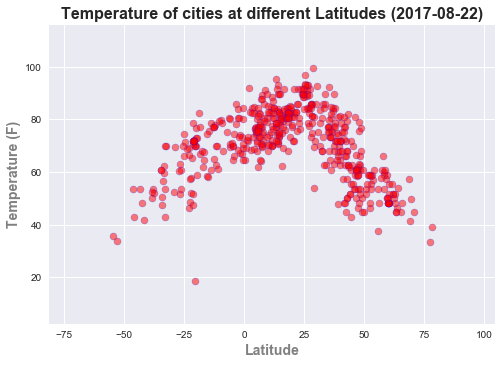

In [33]:
#building scatter plot

fig = plt.figure()

#setting grid using seaborn
sns.set(style = 'darkgrid', color_codes=True)
#plotting scatter
plt.scatter(weather_df['Lat'], weather_df['Max_Temperature'],s=50,color = 'red',edgecolor='blue', alpha=0.5)
#plotting title and axis labels
plt.xlabel('Latitude',color = 'grey', weight = 'bold', fontsize = 14)
plt.ylabel('Temperature (F)',color = 'grey', weight = 'bold', fontsize = 14)
plt.title('Temperature of cities at different Latitudes (2017-08-22)', fontsize = 16, weight = 'bold')
plt.margins(0.2,0.2)
#saving chart
plt.savefig('Temp_vs_Lat.png')
plt.show()

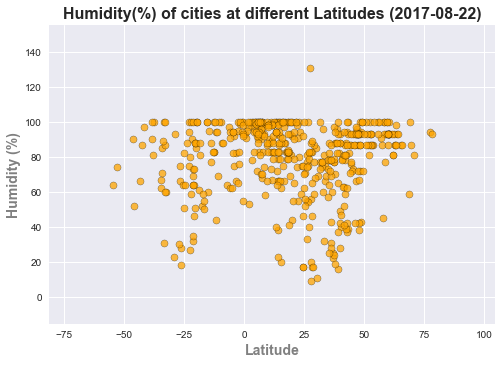

In [34]:
#humidity vd latitude
fig = plt.figure()
sns.set(style = 'darkgrid', color_codes=True)

plt.scatter( weather_df['Lat'], weather_df['Humidity'], s=50, color='orange', edgecolor='black',alpha=0.75)
plt.xlabel("Latitude", color = 'grey', weight = 'bold', fontsize = 14)
plt.ylabel("Humidity (%)",color = 'grey', weight = 'bold', fontsize = 14)
plt.title('Humidity(%) of cities at different Latitudes (2017-08-22)', weight = 'bold', fontsize = 16)
plt.margins(0.2,0.2)
plt.savefig('Humidity_vs_Lat.png')
plt.show()

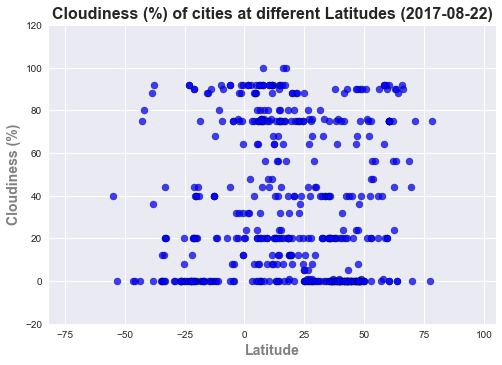

In [35]:
#cloudiness vs latitude
fig= plt.figure()
sns.set(style = 'darkgrid', color_codes=True)
plt.scatter(weather_df['Lat'], weather_df['Clouds'],s=50, edgecolor = 'black',alpha=0.75,color='blue')
plt.xlabel('Latitude',color = 'grey', weight = 'bold', fontsize = 14)
plt.ylabel('Cloudiness (%)',color = 'grey', weight = 'bold', fontsize = 14)
plt.title('Cloudiness (%) of cities at different Latitudes (2017-08-22)', fontsize =16,weight='bold')
plt.margins(0.2,0.2)
plt.savefig('Cloudiness_vs_Lat.png')
plt.show()

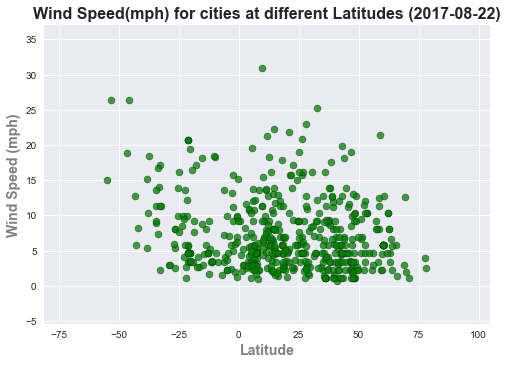

In [36]:
#wind speed vs latitude
fig = plt.figure()
sns.set(style = 'darkgrid', color_codes=True)
plt.scatter(weather_df['Lat'], weather_df['Wind_Speed'],color='green', alpha = 0.75, edgecolor='black', s=50)
plt.xlabel('Latitude',color = 'grey', weight = 'bold', fontsize = 14)
plt.ylabel('Wind Speed (mph)',color = 'grey', weight = 'bold', fontsize = 14)
plt.title('Wind Speed(mph) for cities at different Latitudes (2017-08-22)', fontsize = 16, weight = 'bold')
plt.margins(0.2,0.2)
plt.savefig('WindSpeed_vs_Lat.png')
plt.show()

### Findings:
1. Its said that as we approach equator the temperature rises - it seems true from the chart no. 1 because latitude for Equator is 0 and we can see cities having maximum temperature are located around latitude 0 - which is equator.
2. Where as for Humidity, as in the chart, the more a city is closer to equator, the humidity % drops. So in a way humidity vs latitude has a reverse pattern than temperature vs latitude. The cities near equator have lower humidity levels.
3. For cloudiness, it seems latitude is not the only factor affecting the cloudiness. In wide range of latitude cloudiness can be observed. However, it can be said that regions/cities in the mid-latitude range e.g around 50s have more cloud%
4. The wind speed in regions/cities around equator or in range of lower latitudes seems to be low compared to regions/cities farther away from equator. However, there can be outliers where region might have 0 latitude but higher longitude range where wind speed might be higher